In [27]:
import os
import cv2
import matplotlib.pyplot as plt
import random
import cv2
import time

In [28]:
"""INPUTS"""
dataset_dir = r"H:\my_files\my_programs\cat_upscaler\datasets\cat_downscale_4"
expected_image_width = 2560
expected_image_height = 2560

In [29]:
def show_cv2_image(cv2_image):
    plt.imshow(cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB))
    plt.show()

def show_images_side_by_side(lr, hr):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(lr)
    plt.title('lr')

    plt.subplot(1, 2, 2)
    plt.imshow(hr)
    plt.title('hr')

    plt.show()


def progress_printout(good_count, bad_count, total_count, start_time):
    time_seconds_taken = int(time.time() - start_time)
    current_count = good_count + bad_count
    good_percent = (good_count / current_count * 100) if total_count > 0 else 0
    bad_percent = (bad_count / current_count * 100) if current_count > 0 else 0
    current_percent = (current_count / total_count * 100) if total_count > 0 else 0

    out_string = ""
    out_string += f"\nTime taken: {time_seconds_taken} seconds"
    out_string += f"\nGood: {good_count} ({good_percent:.2f}%)"
    out_string += f"\nBad: {bad_count} ({bad_percent:.2f}%)"
    out_string += f"\nCurrent: {current_count}/{total_count} ({current_percent:.2f}%)\n"
    print(out_string, end="\r")


def get_image_dimensions(file_path):
    image = cv2.imread(file_path)
    dimensions = image.shape
    return dimensions

In [30]:
"""Check file structure"""

hr_folder = os.path.join(dataset_dir, "hr")
lr_folder = os.path.join(dataset_dir, "lr")

good_folders = True
for folder in [lr_folder, hr_folder, dataset_dir]:
    if not os.path.isdir(folder):
        print(f"This folder doesnt exist: {folder}")
        good_folders = False
if good_folders:
    print("Verified good file structure for this dataset")

Verified good file structure for this dataset


In [31]:
"""Check that files line up between train and val"""

lr_files = os.listdir(lr_folder)
hr_files = os.listdir(hr_folder)

if len(lr_files) != len(hr_files):
    print('number of files in hr and lr folders are not equal')

lr_files_are_matched=True
for file_name in lr_files:
    if file_name not in hr_files:
        for i in range(3):print(f'ERROR!!!! {file_name}  exists in lr folder but not in hr folder')
        lr_files_are_matched=False
if lr_files_are_matched:
    print('All LR files have a mathcing HR file')

hr_files_are_matched=True
for file_name in hr_files:
    if file_name not in lr_files:
        for i in range(3):print(f'ERROR!!!! {file_name}  exists in hr folder but not in lr folder')
        hr_files_are_matched=False
if hr_files_are_matched:
    print('All HR files have a mathcing LR file')

print(f'Number of files in hr folder: {len(hr_files)}')
print(f'Number of files in lr folder: {len(lr_files)}')

All LR files have a mathcing HR file
All HR files have a mathcing LR file
Number of files in hr folder: 3342
Number of files in lr folder: 3342


------------------------------------------------------------------------------------------------------------------------------------------------------


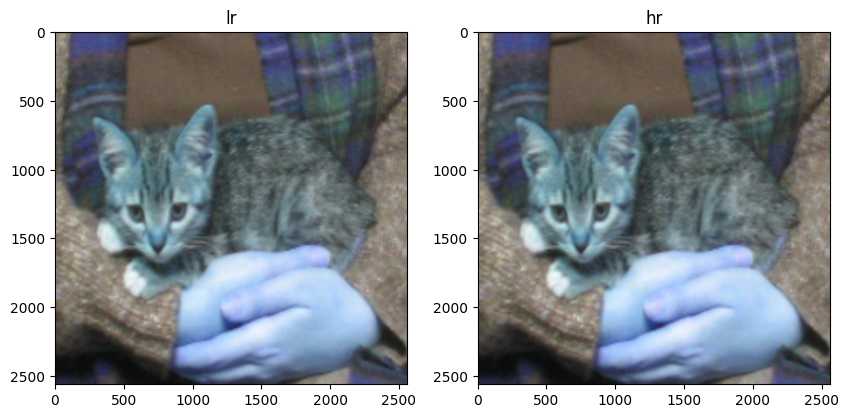

random_lr_file: 886.png
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------


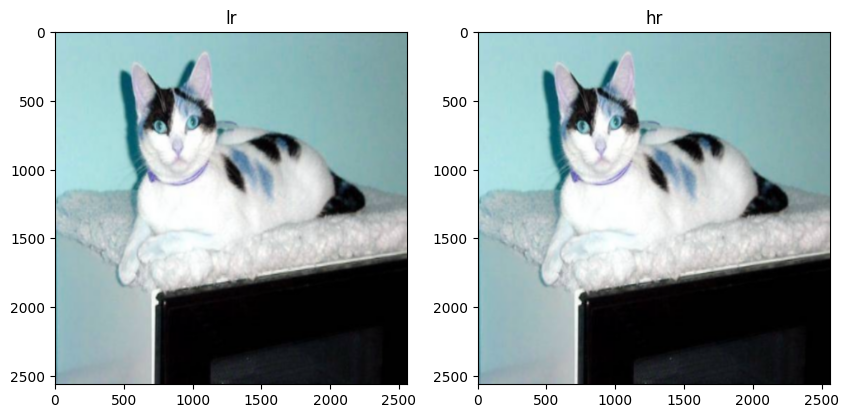

random_lr_file: 2174.png
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------


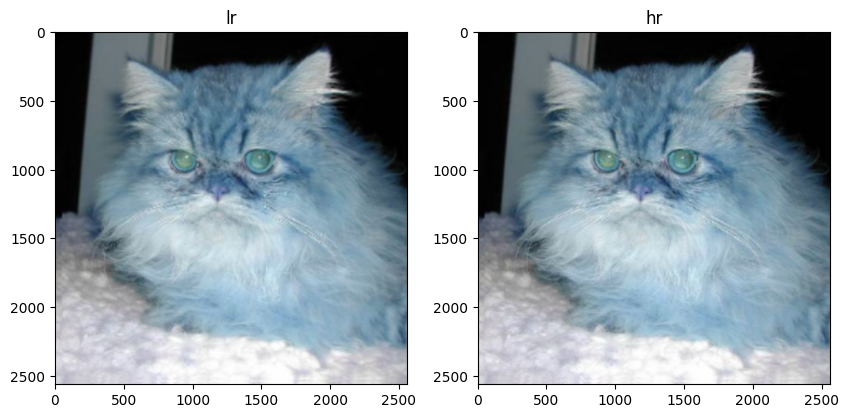

random_lr_file: 350.png
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------


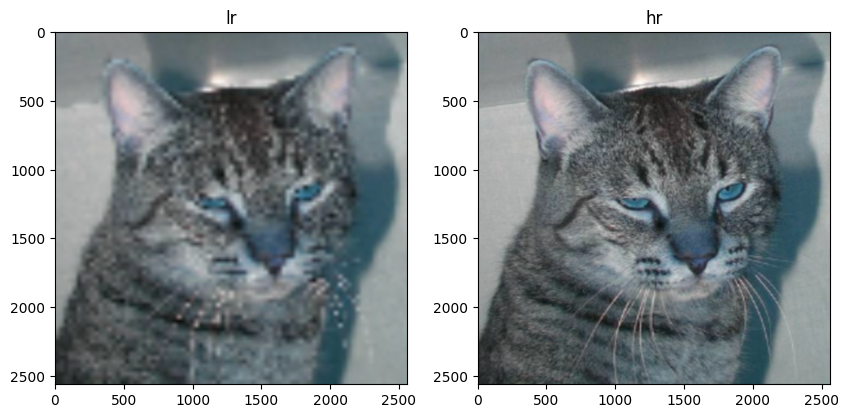

random_lr_file: 2806.png
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------


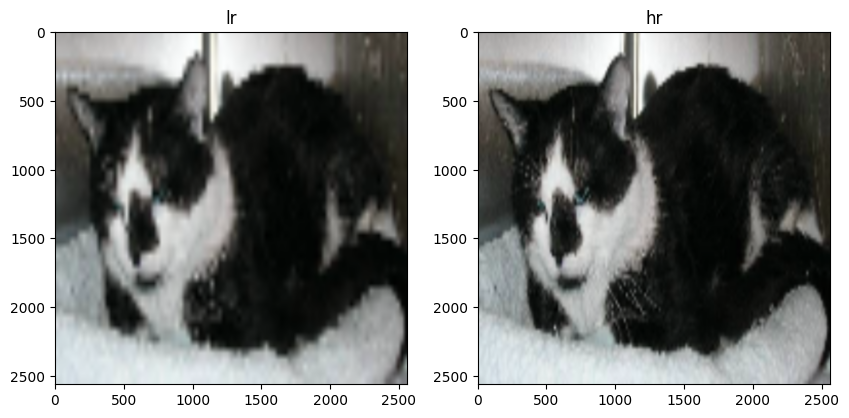

random_lr_file: 2366.png
------------------------------------------------------------------------------------------------------------------------------------------------------


In [32]:
"""Show some samples of the image sets"""



for random_lr_file in random.sample(lr_files, 5):
    print('---'*50)
    lr_file_path = os.path.join(lr_folder, random_lr_file)
    hr_file_path = os.path.join(hr_folder, random_lr_file)
    lr_image = cv2.imread(lr_file_path)
    hr_image = cv2.imread(hr_file_path)
    show_images_side_by_side(lr_image, hr_image)
    print('random_lr_file:', random_lr_file)
    print('---'*50)

In [33]:
"""Verify all the images are of the correct size"""

lr_image_paths = [os.path.join(lr_folder,f ) for f in os.listdir(lr_folder) if f.endswith('.png') or f.endswith('.jpg')]
hr_image_paths = [os.path.join(hr_folder,f ) for f in os.listdir(hr_folder) if f.endswith('.png') or f.endswith('.jpg')]

good_sizes = 0
bad_sizes = 0
size_check_start_time = time.time()

for image_path in lr_image_paths + hr_image_paths:
    dims = get_image_dimensions(image_path)
    if dims[1] != expected_image_width or dims[0] != expected_image_height:
        print(f'Image {image_path} has dimensions {dims} which are not {expected_image_width}x{expected_image_height}')
        bad_sizes+=1
    else:
        good_sizes+=1

    progress_printout(good_sizes,bad_sizes,len(lr_image_paths + hr_image_paths),size_check_start_time)


Time taken: 0 seconds
Good: 1 (100.00%)
Bad: 0 (0.00%)
Current: 1/6684 (0.01%)

Time taken: 0 seconds
Good: 2 (100.00%)
Bad: 0 (0.00%)
Current: 2/6684 (0.03%)

Time taken: 0 seconds
Good: 3 (100.00%)
Bad: 0 (0.00%)
Current: 3/6684 (0.04%)

Time taken: 0 seconds
Good: 4 (100.00%)
Bad: 0 (0.00%)
Current: 4/6684 (0.06%)

Time taken: 0 seconds
Good: 5 (100.00%)
Bad: 0 (0.00%)
Current: 5/6684 (0.07%)

Time taken: 0 seconds
Good: 6 (100.00%)
Bad: 0 (0.00%)
Current: 6/6684 (0.09%)

Time taken: 0 seconds
Good: 7 (100.00%)
Bad: 0 (0.00%)
Current: 7/6684 (0.10%)

Time taken: 0 seconds
Good: 8 (100.00%)
Bad: 0 (0.00%)
Current: 8/6684 (0.12%)

Time taken: 0 seconds
Good: 9 (100.00%)
Bad: 0 (0.00%)
Current: 9/6684 (0.13%)

Time taken: 0 seconds
Good: 10 (100.00%)
Bad: 0 (0.00%)
Current: 10/6684 (0.15%)

Time taken: 0 seconds
Good: 11 (100.00%)
Bad: 0 (0.00%)
Current: 11/6684 (0.16%)

Time taken: 0 seconds
Good: 12 (100.00%)
Bad: 0 (0.00%)
Current: 12/6684 (0.18%)

Time taken: 1 seconds
Good: 13 (1

KeyboardInterrupt: 